# Crank Nicolson Scheme

We will use the Crank Nicolson scheme to solve the advection diffusion equation

$$ \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2} $$
for the conditions:
$$ c = 1 $$
$$ u(x, 0) = sin(\pi x) $$
$$ u(0, t) = u(1, t) = 0 $$


In [3]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [4]:

dx = 0.05
dt = 0.05
# Range of X and T
rX = 1
rT = 1
m = int(rX/dx)
n = int(rT/dt)
X = np.linspace(0, rX, m+1)
Y = np.linspace(0, rT, n)
def crank_nikolson(c, v):

    U = np.zeros((n, m+1), dtype=np.float32)
    U[:, 0] = 0
    U[:, m] = 0
    U[0,:] = np.sin(np.pi*X)
    for k in range(1, n-1):
        A = [v/dx**2 + c/(2*dx) for i in range(1, m)]
        B = [-(2*v)/(dx**2) - 2/dt for i in range(1, m)]
        C = [v/dx**2 - c/(2*dx) for i in range(1, m)]
        D = [U[k-1, j]*((2*v)/(dx**2) - 2/dt) - U[k-1, j-1]*((v)/(dx**2) + c/(2*dx)) - U[k-1, j+1]*((v)/(dx**2) - c/(2*dx)) for j in range(1,m)]
        D[0] = D[0] - U[k, 0]*(v/(dx**2) + c/(2*dx))
        D[m-2] = D[m-2] - U[k,m]*((v/dx**2) - c/(2**dx))
        U[k, 1:m ] = np.array(thomas_algorithm(A, B, C, D))
    return U

In [5]:
def thomas_algorithm(a, b, c, d):
    """
    Solves the Tridiagonal Linear System
          --             -- -- --   -- --
          |b_1 c_1        | |f_1|   |d_1|
          |a_2 b_2 c_2    | | . |   | . |
          |    a_3 . . .  | | . | = | . |
          |               | |   |   |   |
          |               | |   |   |   |
          |       a_n b_n | |f_n|   |d_n|
          --             -- -- --   -- --
    """
    assert len(a) == len(b) == len(c) == len(d)
    N = len(c)
    c_ = [None for i in range(N)]
    d_ = [None for i in range(N)]
    f = [None for i in range(N)]
    c_[0] = c[0]/b[0]
    d_[0] = d[0]/b[0]

    for i in range(1, N):
        c_[i] = c[i]/(b[i] - a[i]*c_[i-1])
        d_[i] = (d[i] - a[i]*d_[i-1])/(b[i] - a[i]*c_[i-1])

    f[N-1] = d_[N-1]
    for i in range(N-2, -1, -1):
        f[i] = d_[i] - c_[i]*f[i+1]

    return f

In [6]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation


## u(x, t) with varying t


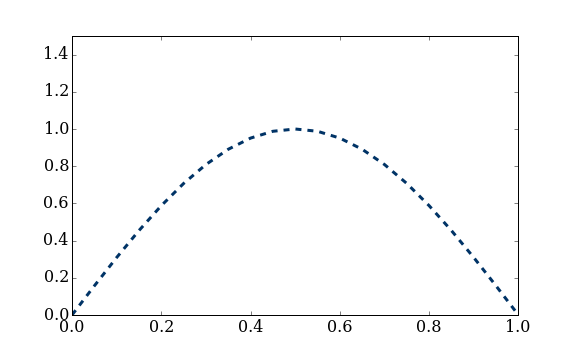
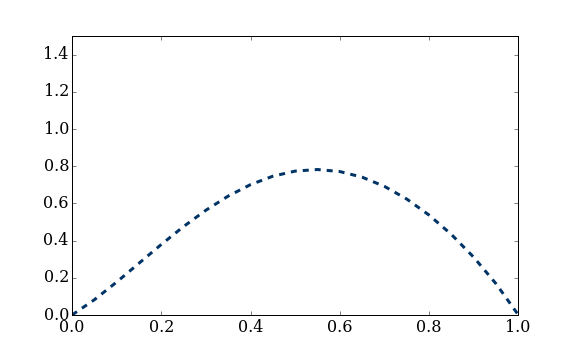
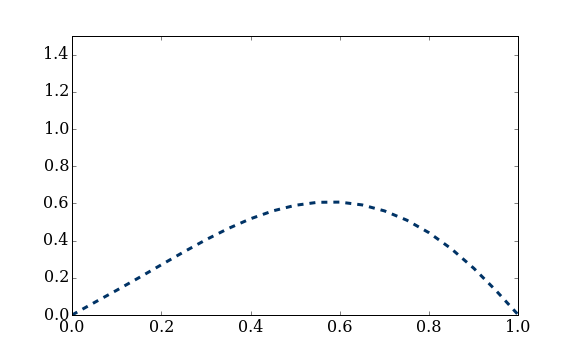
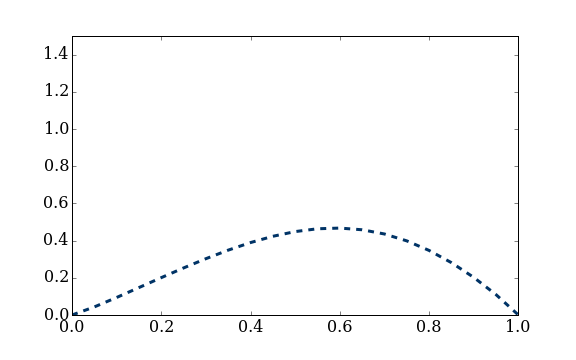
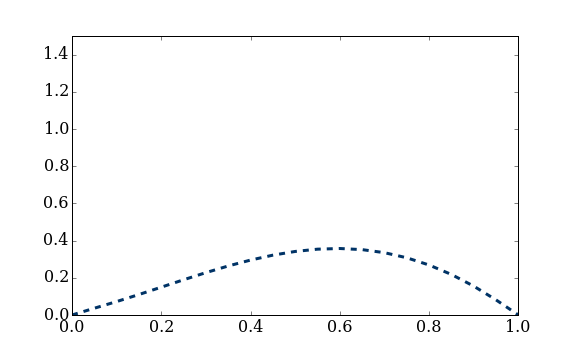
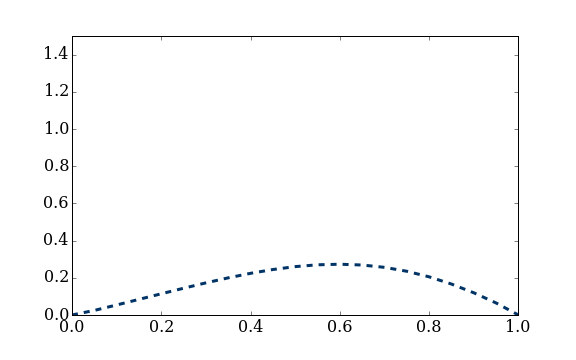
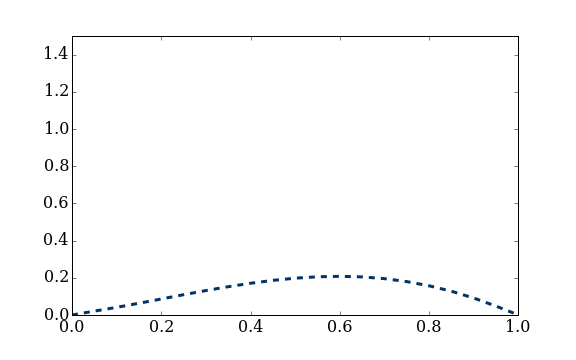
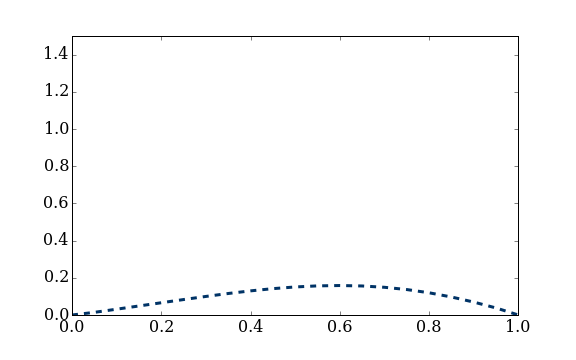
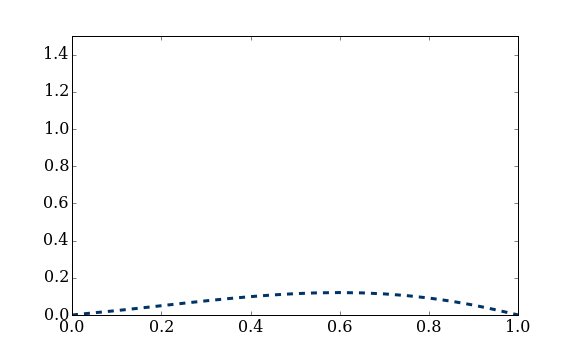
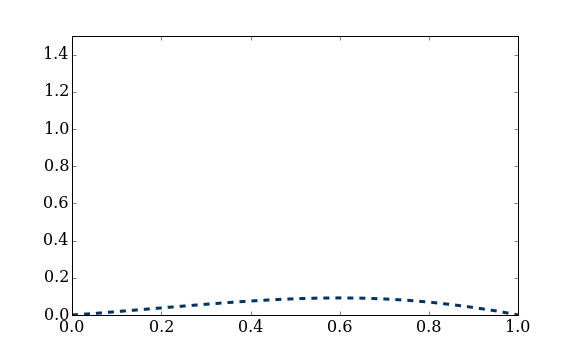
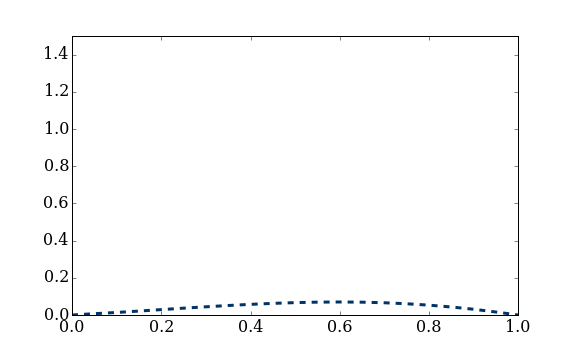
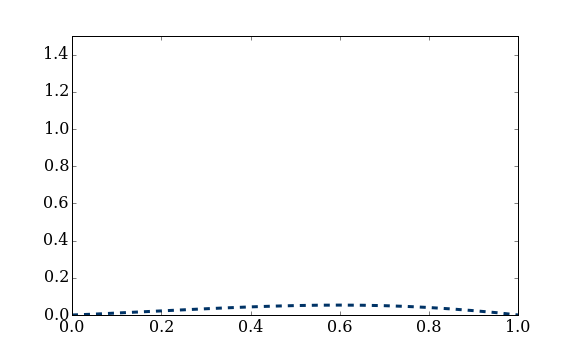
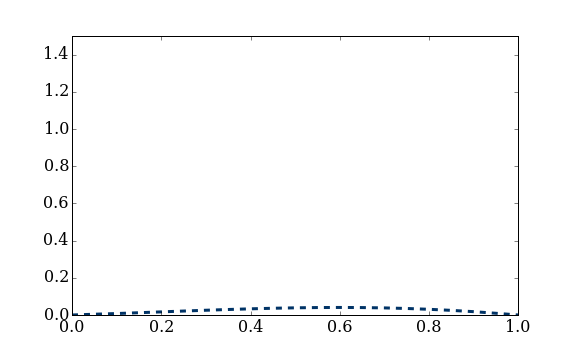
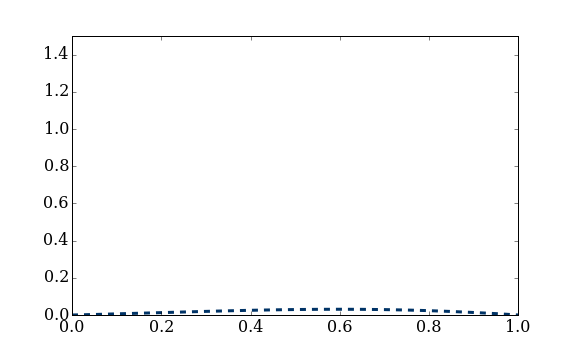
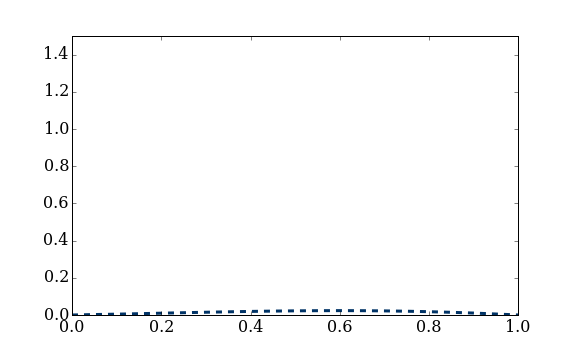
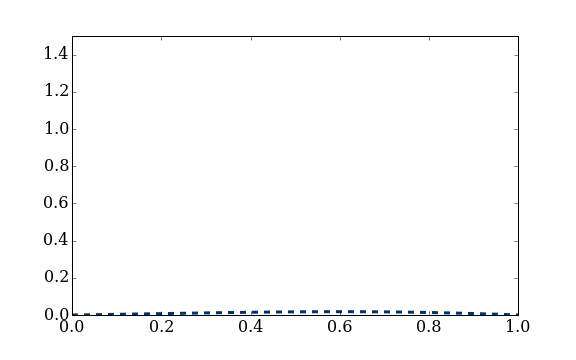
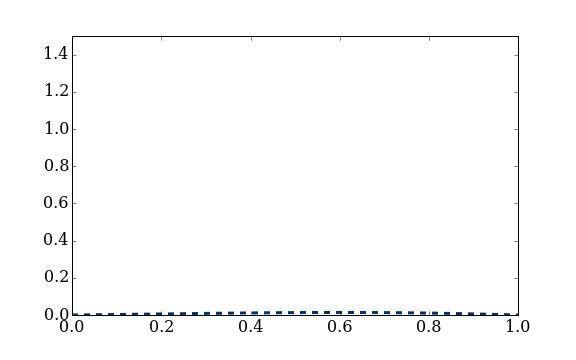
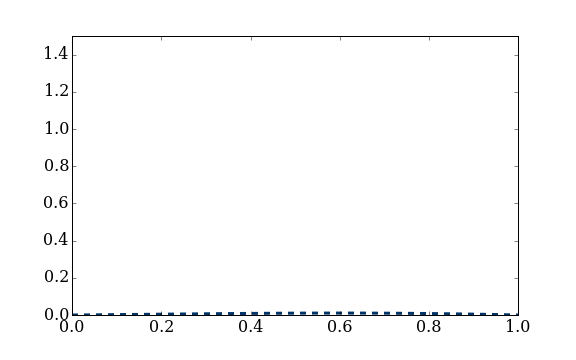
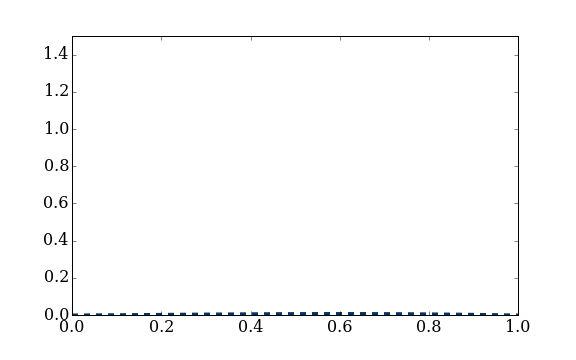
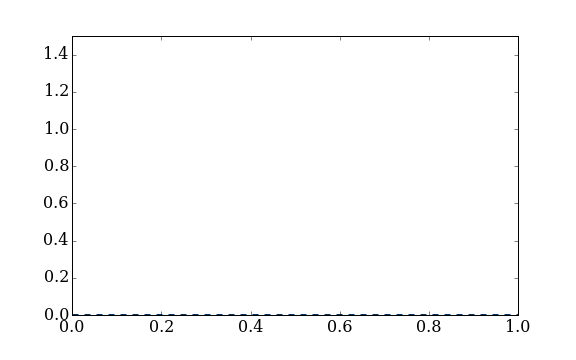

In [36]:
fig = pyplot.figure(figsize=(8,5))
# ax = pyplot.axes()
pyplot.axis([0, 1, 0, 1.5])
line = pyplot.plot([], [], color='#003366', ls='--', lw=3)[0]

def display_varying_t(i):
    u = crank_nikolson(1, 0.5)
    line.set_data(X, u[i, :])
    # line.label(r't = ' + str(i*dt))
    # line.aname('x')
animation.FuncAnimation(fig, display_varying_t,
                        frames=n, interval=100)

## Plot at t = 0.5 with varying v


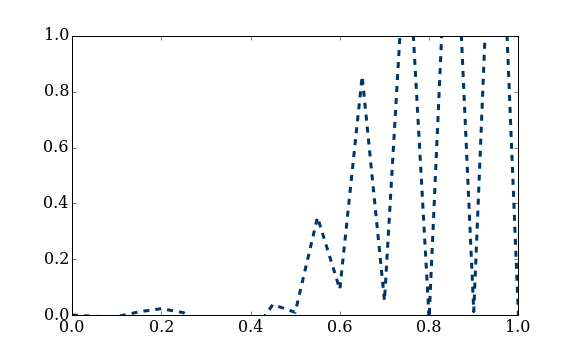
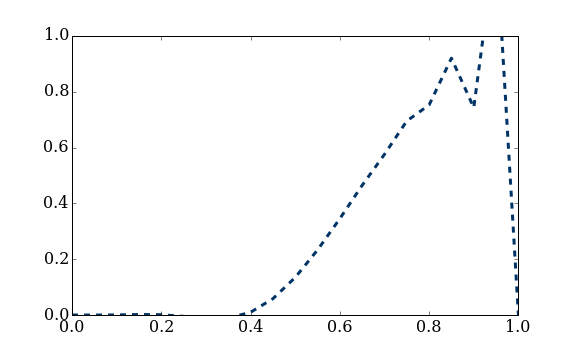
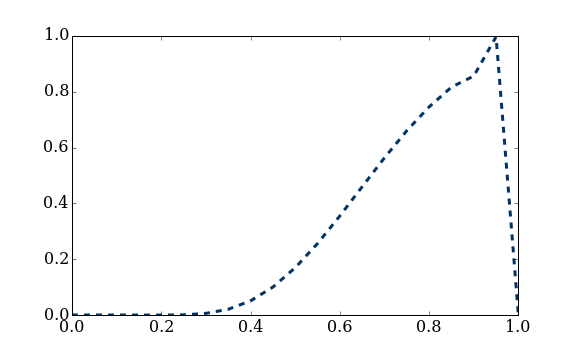
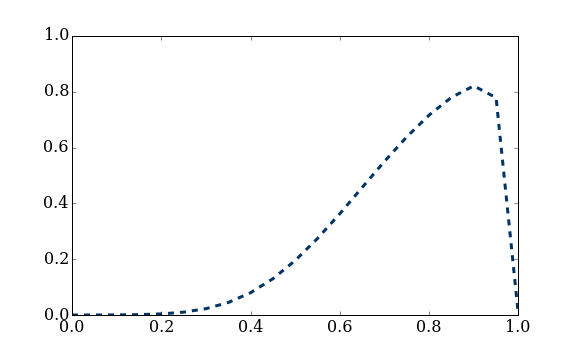
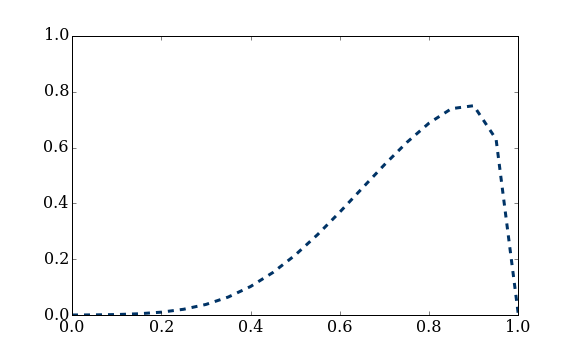
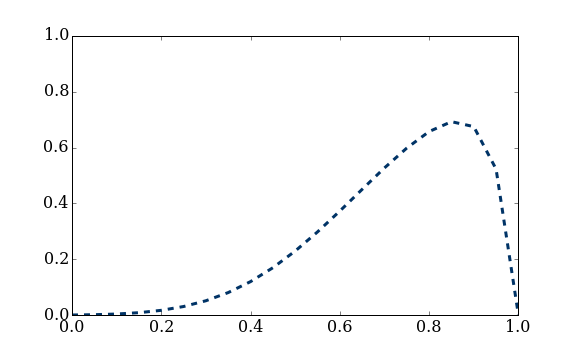
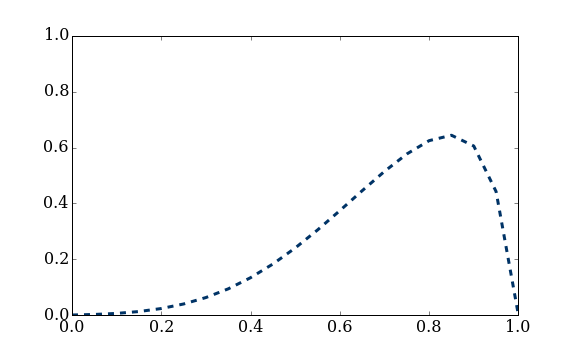
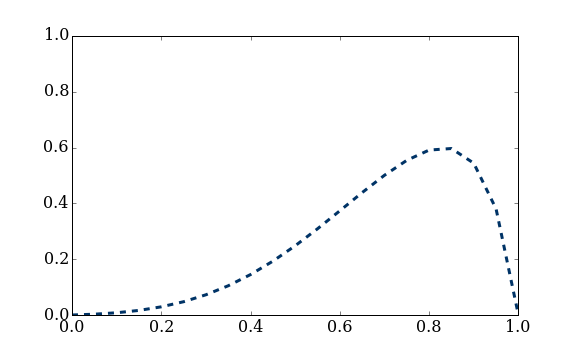
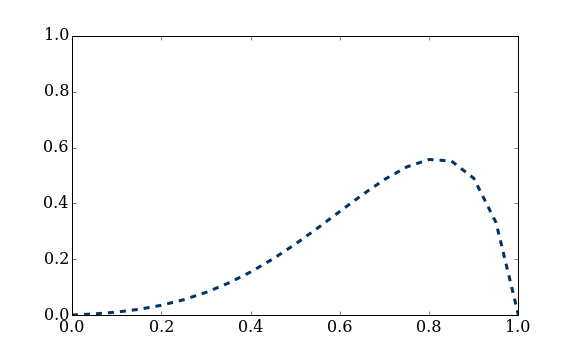
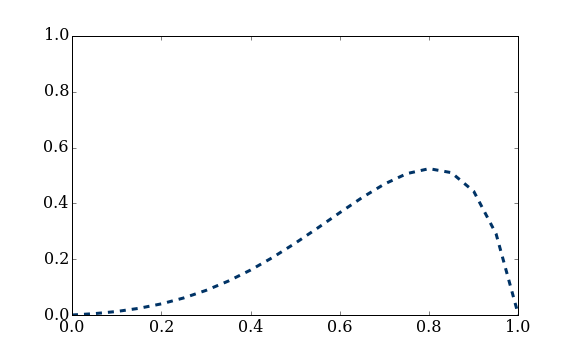
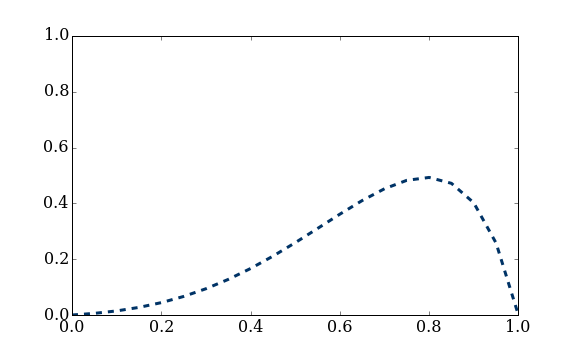
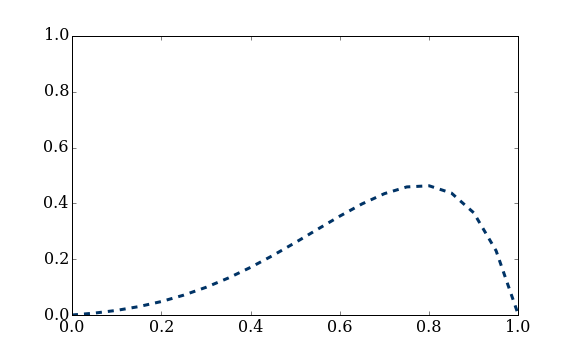
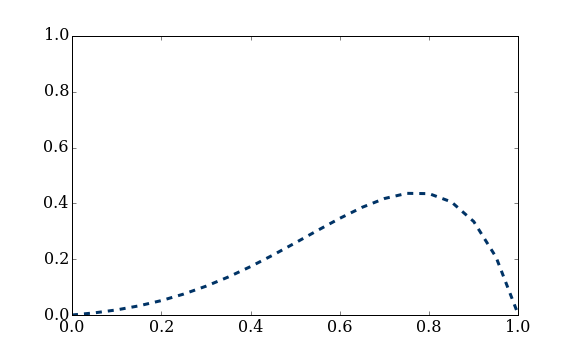
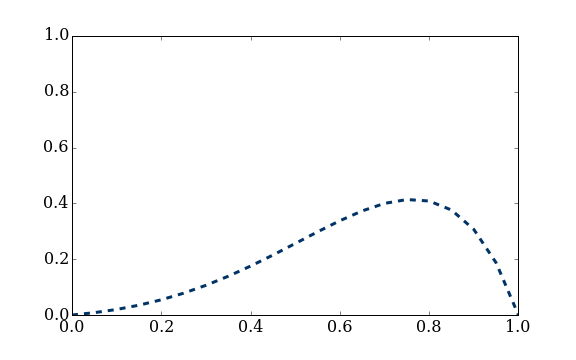
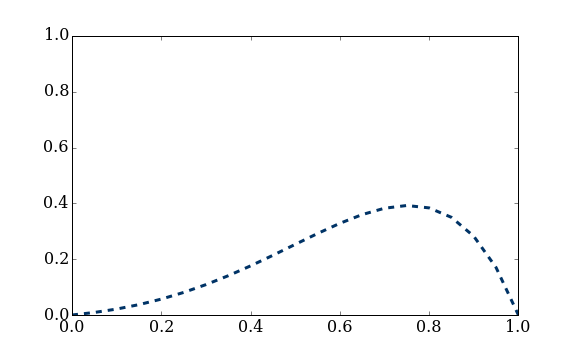
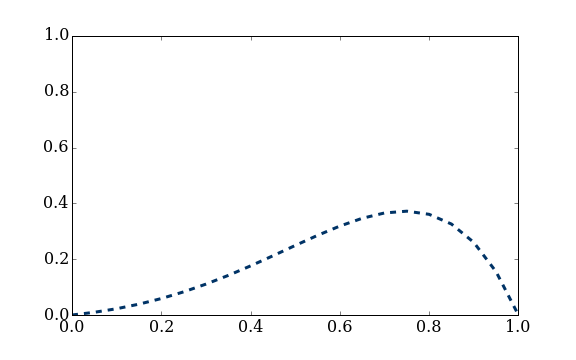
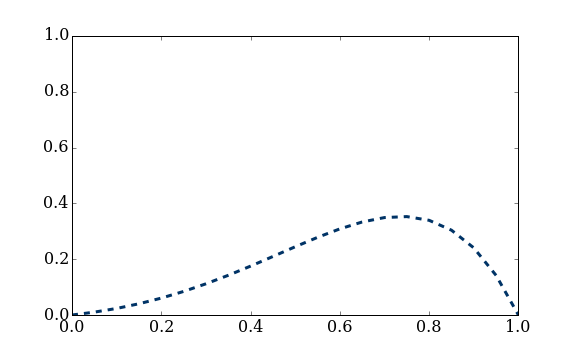
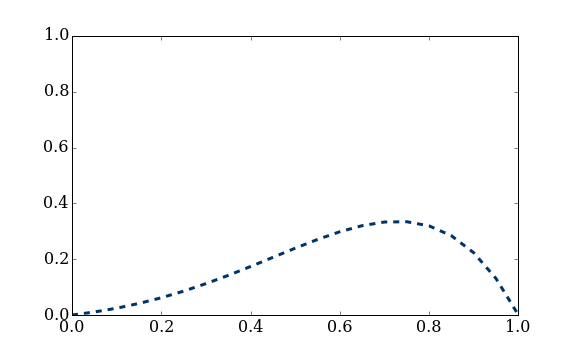
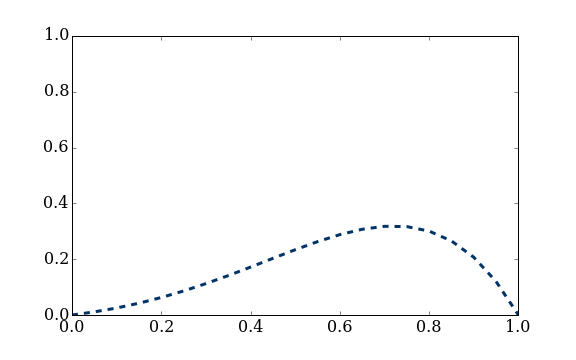
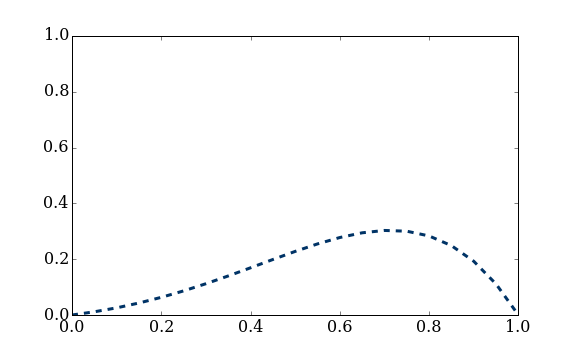
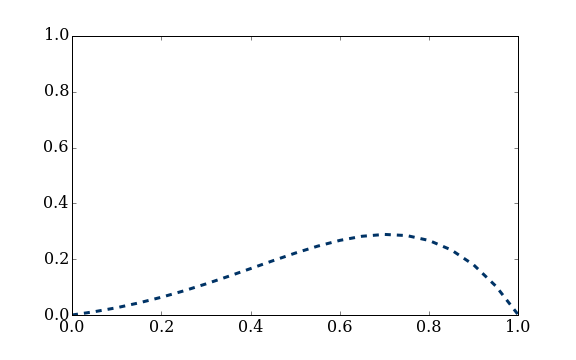
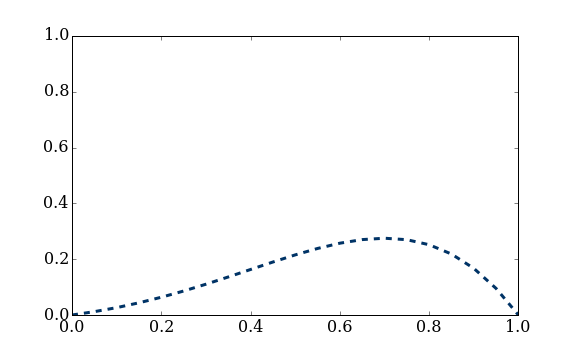
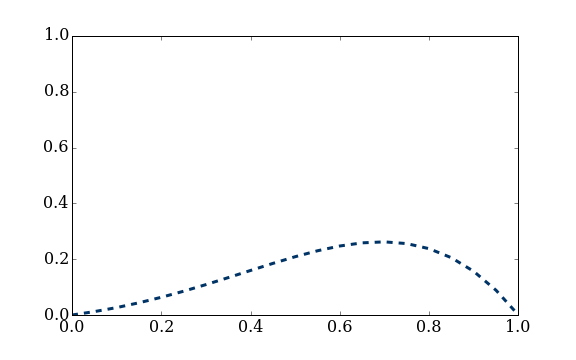
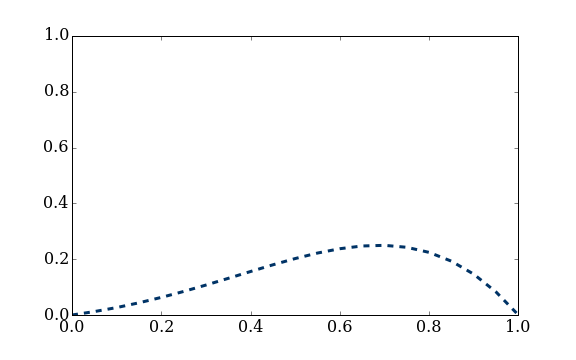
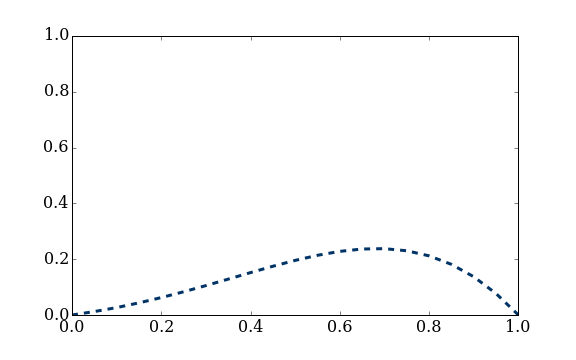
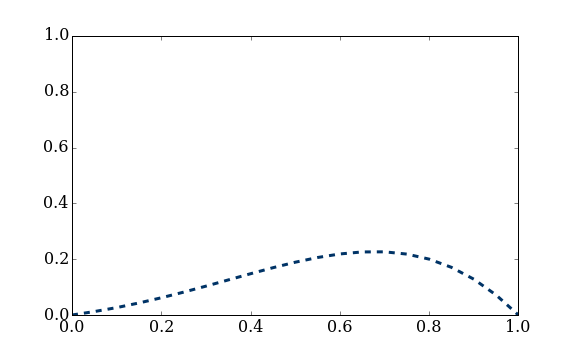
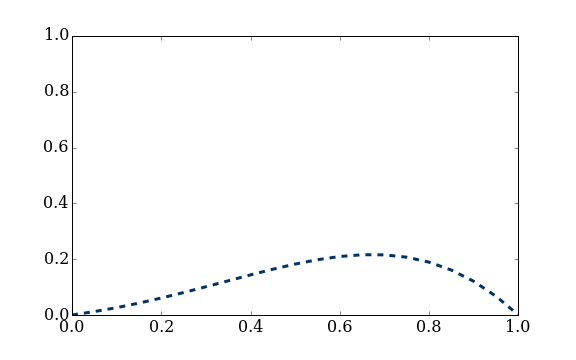
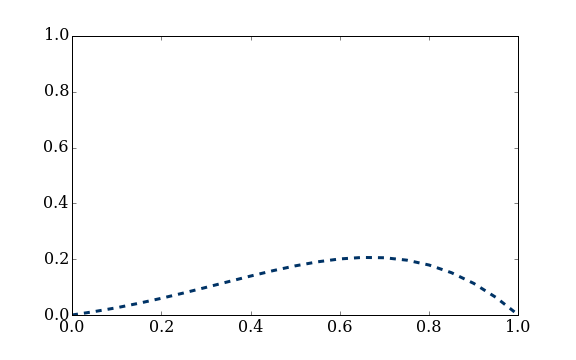
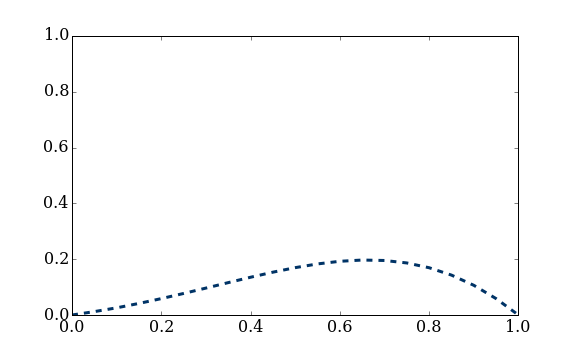
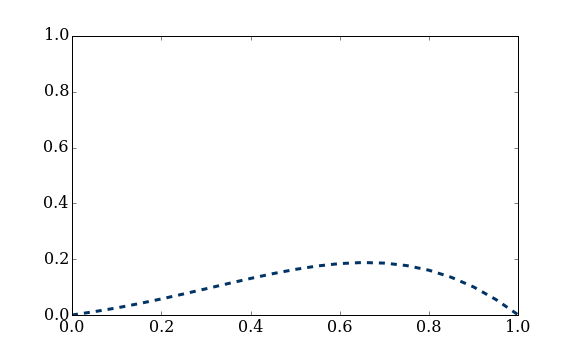
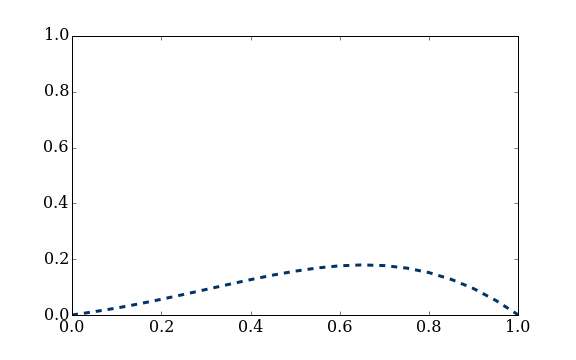
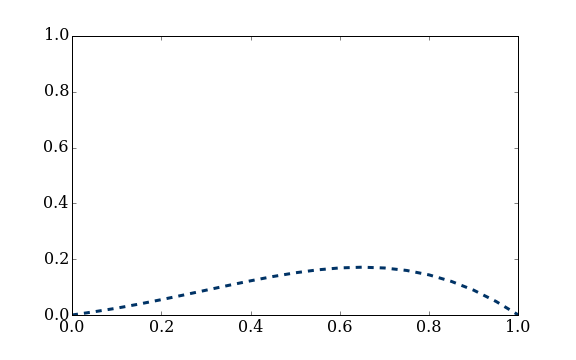
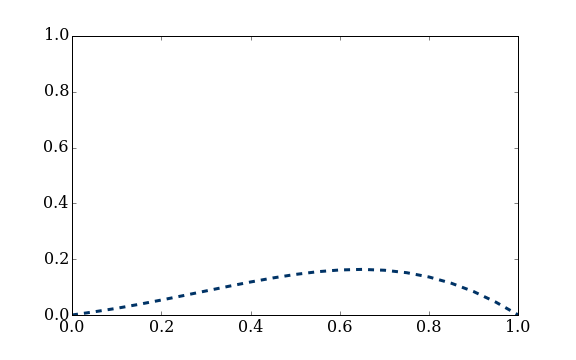
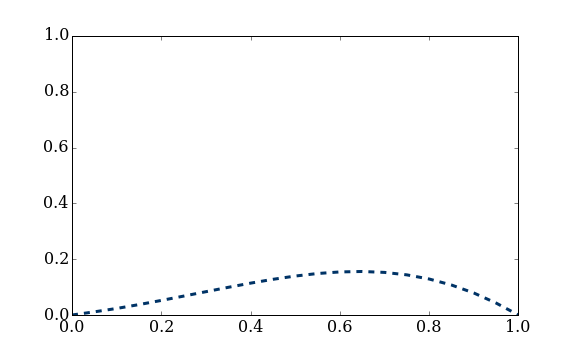
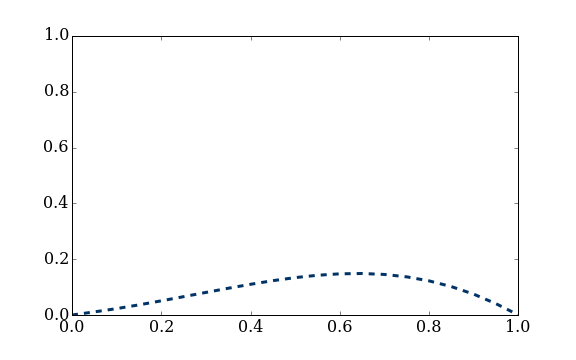
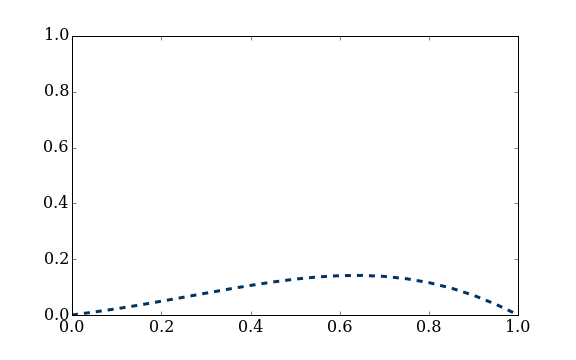
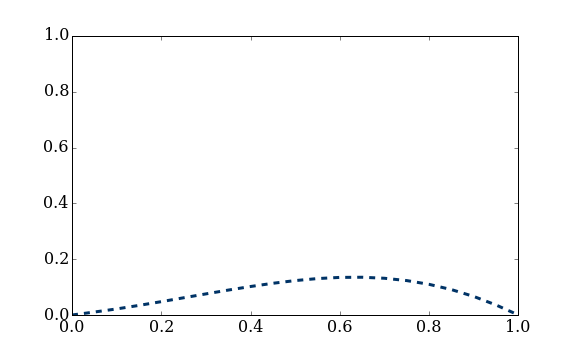
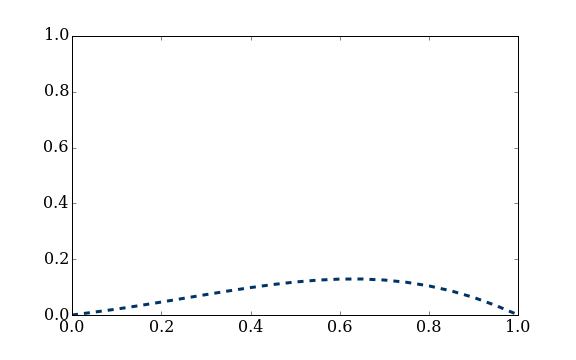
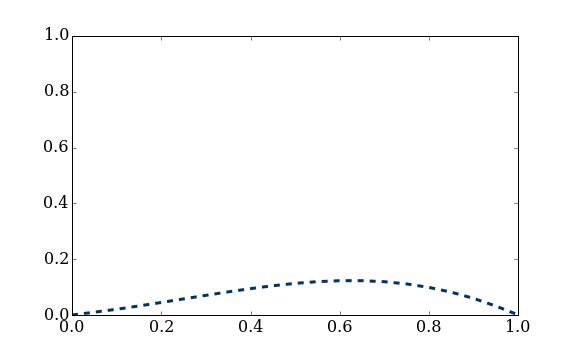
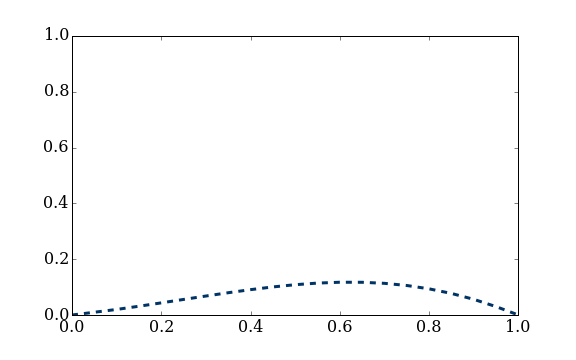
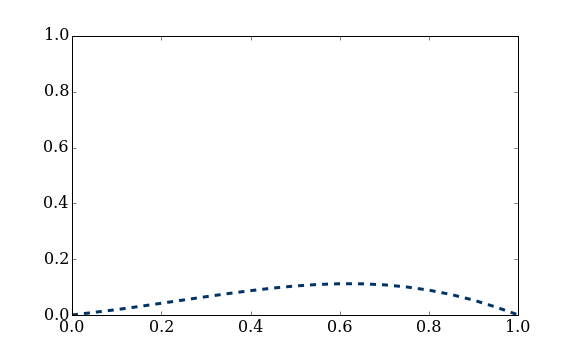
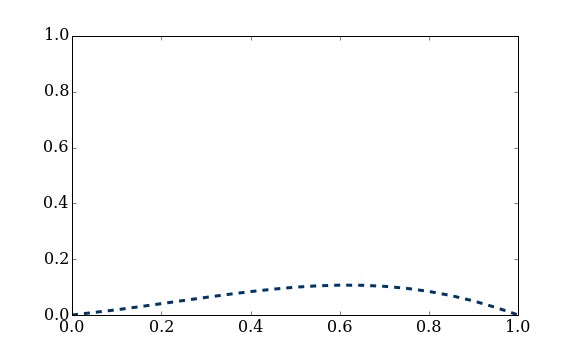
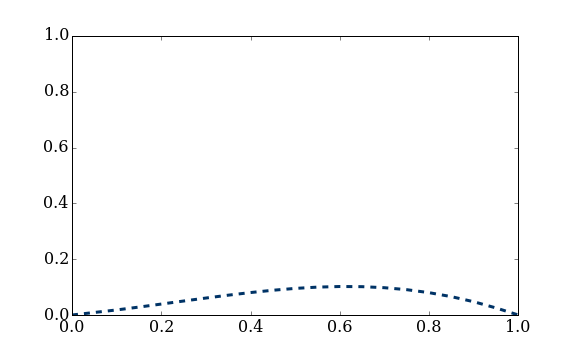
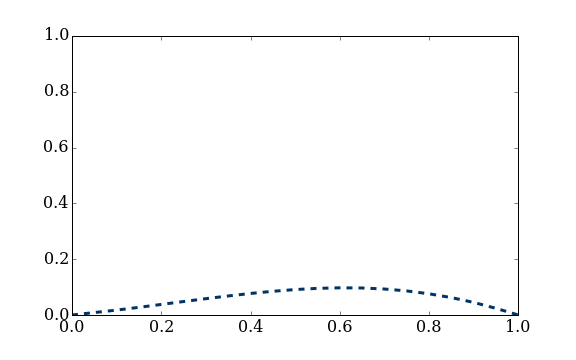
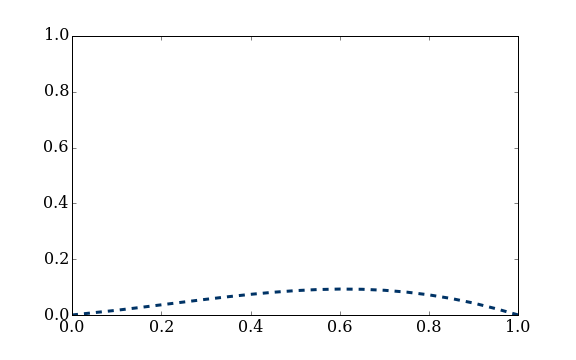
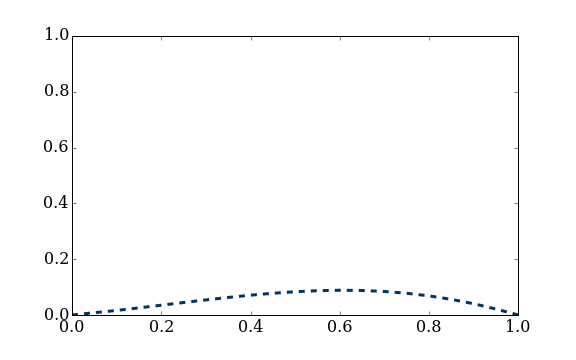
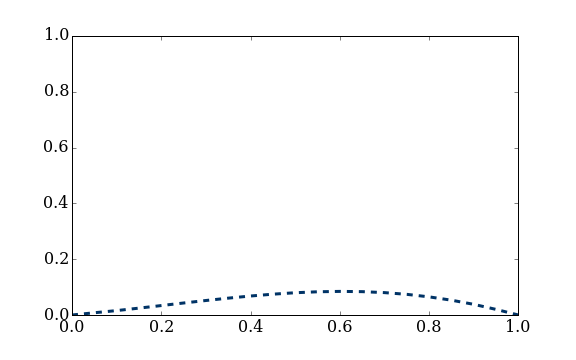
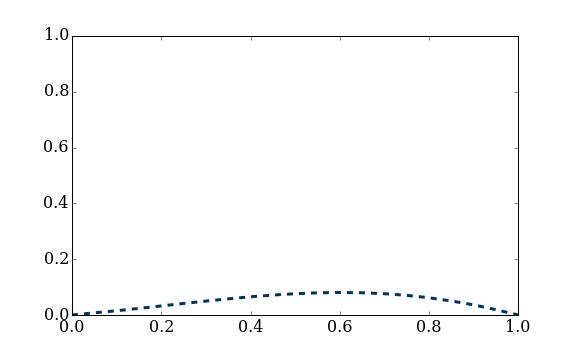
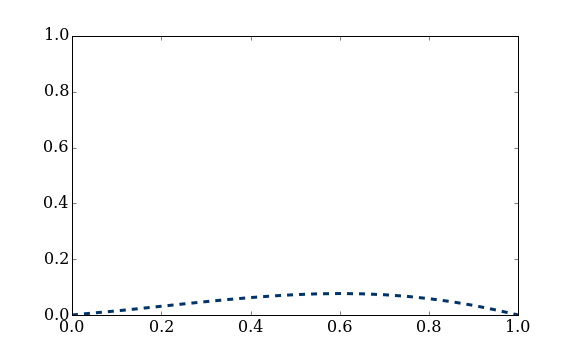
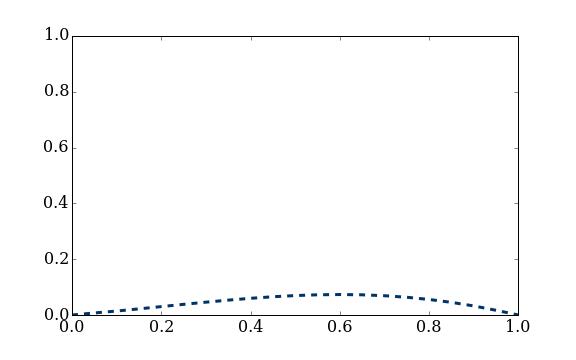
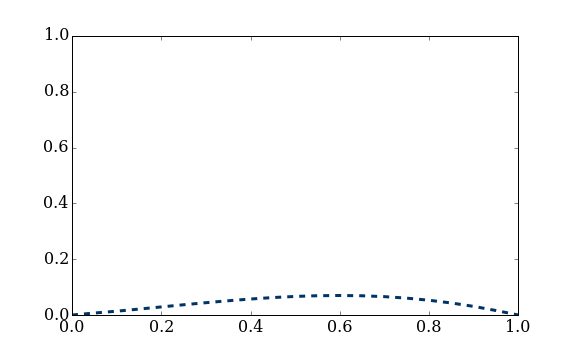
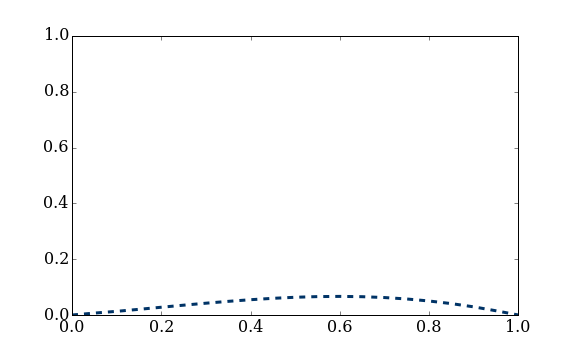
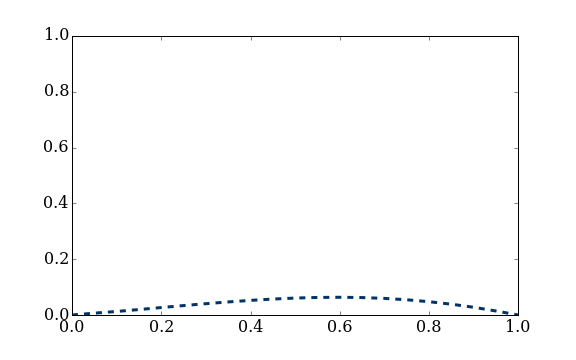
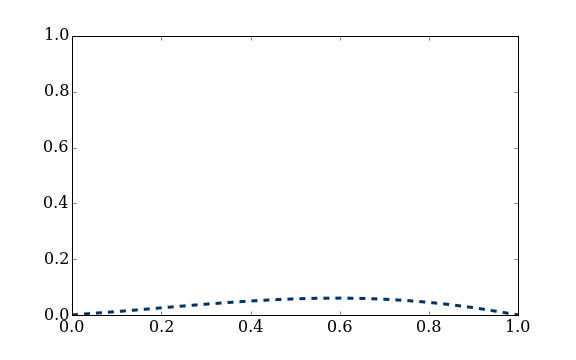
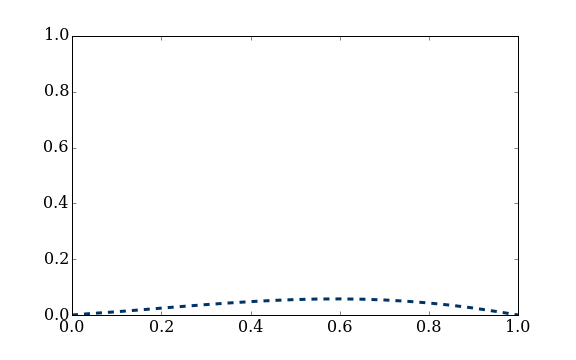
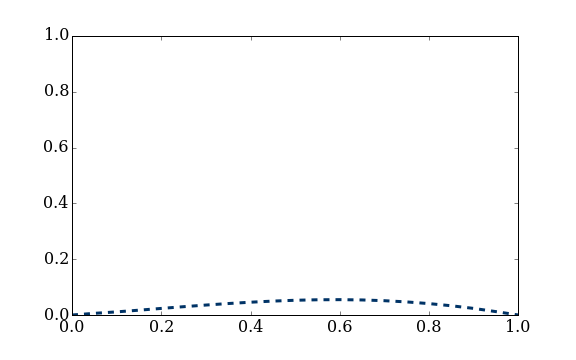
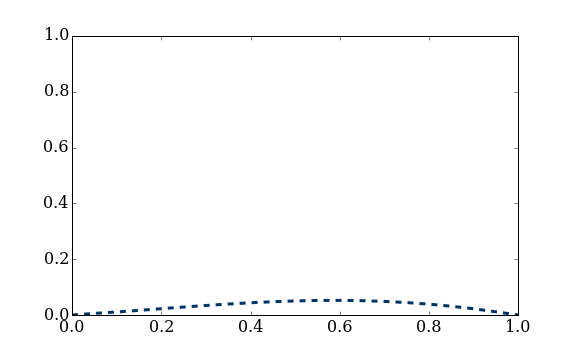
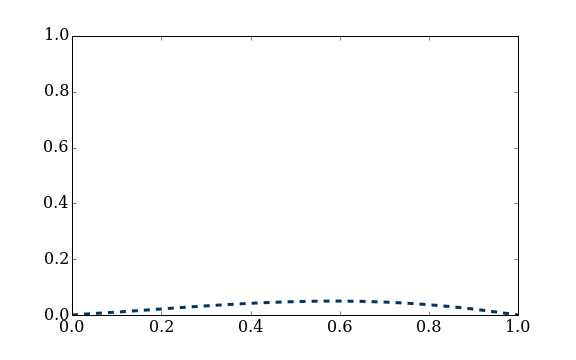
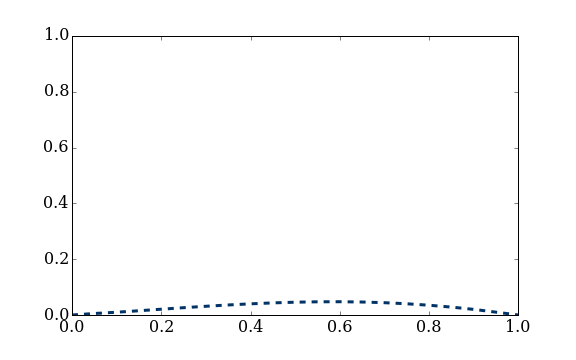
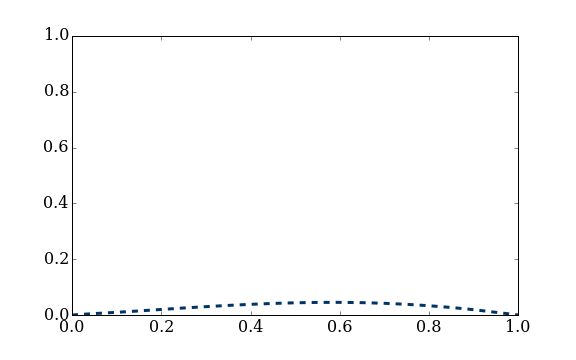
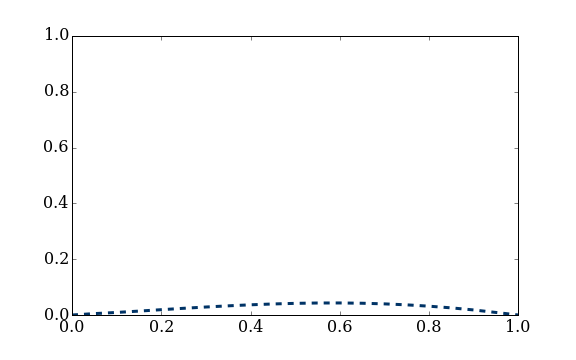
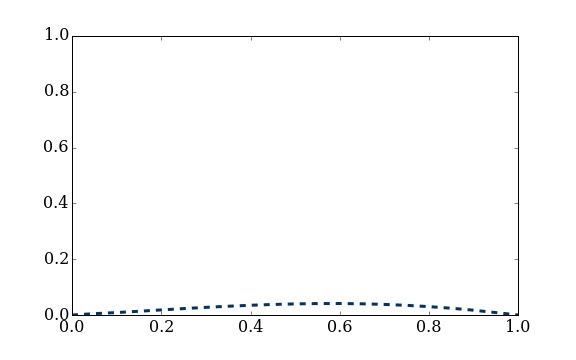
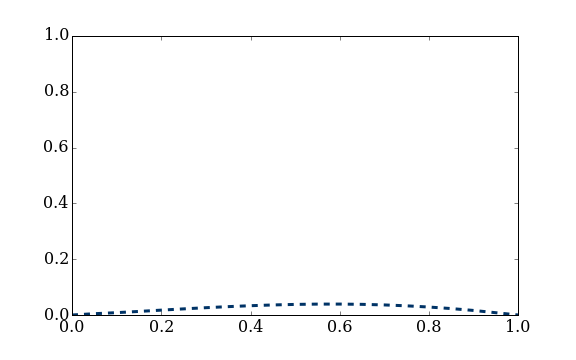
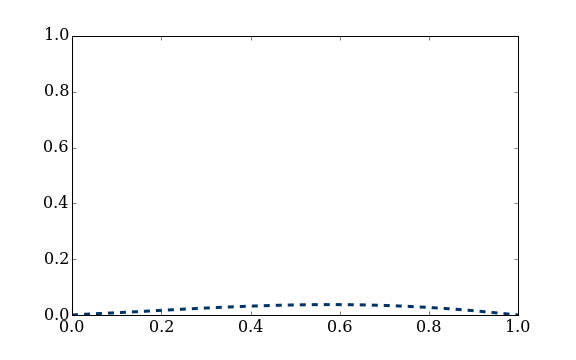
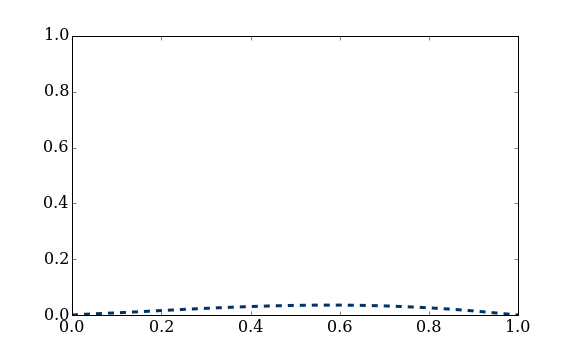
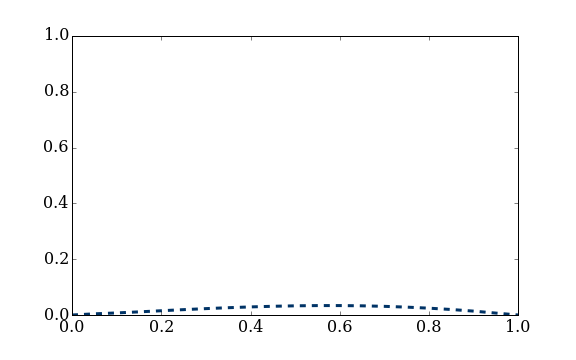
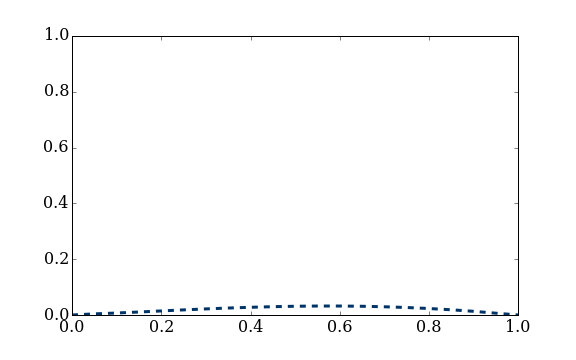
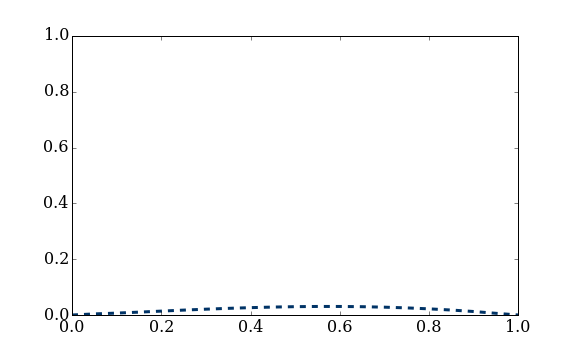
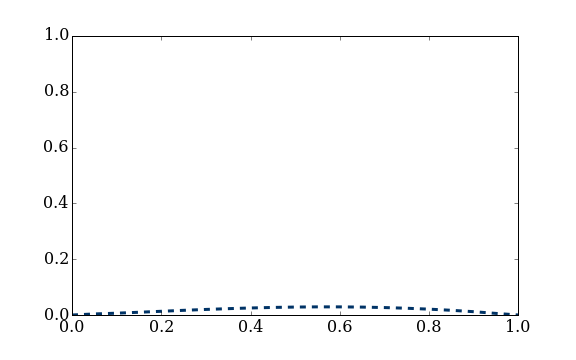
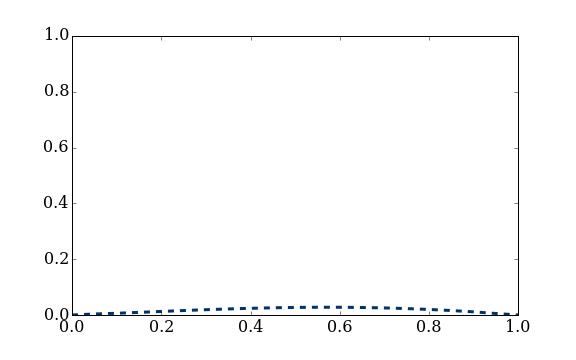
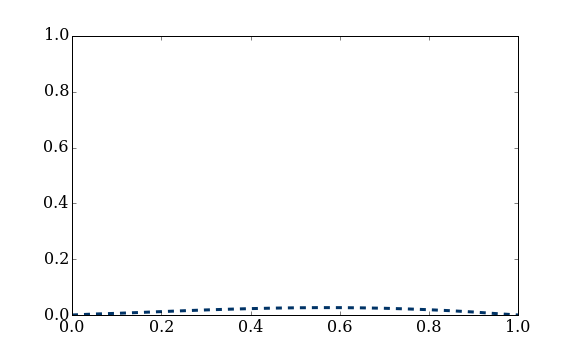
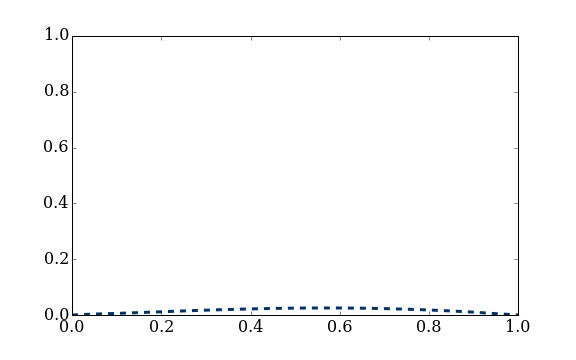
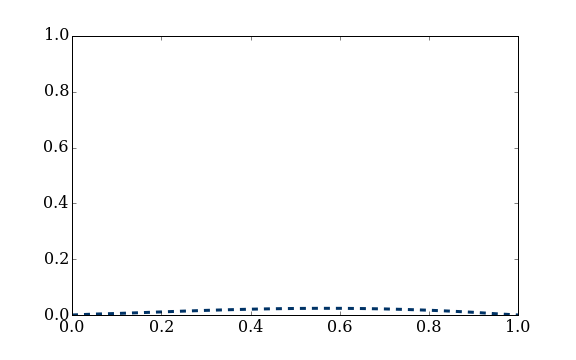
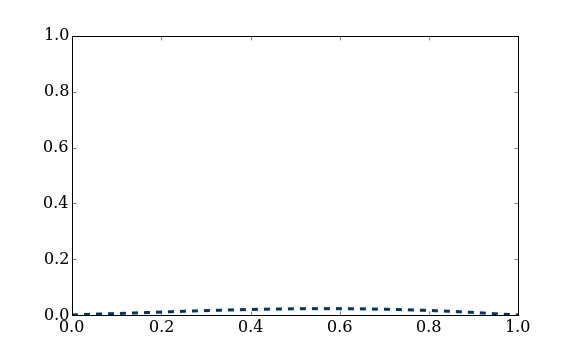
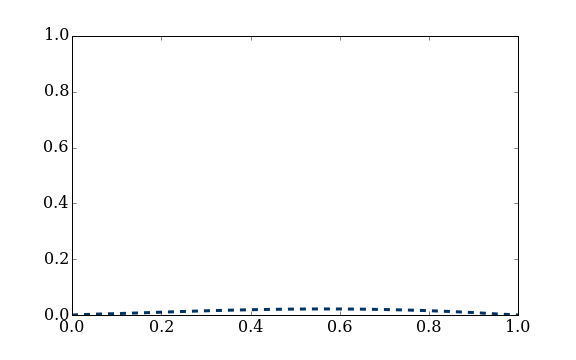
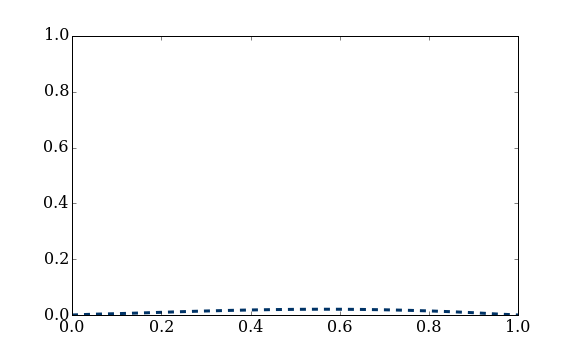
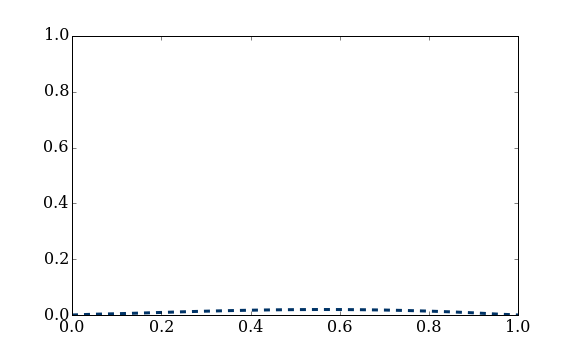
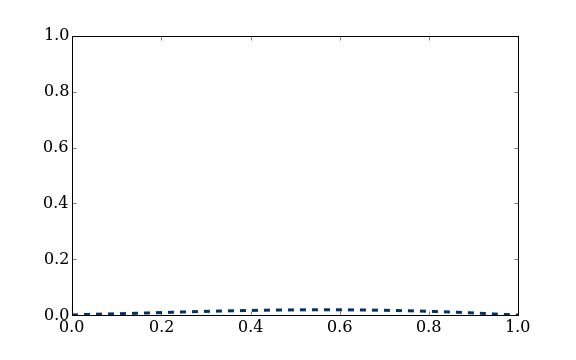
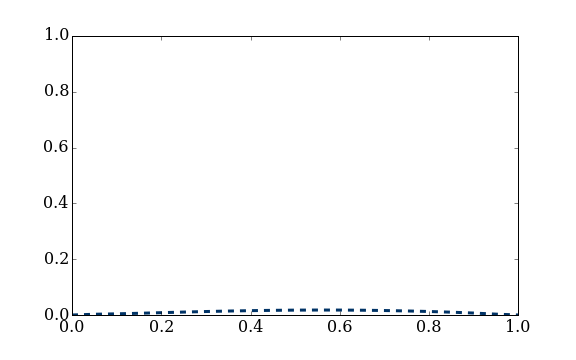
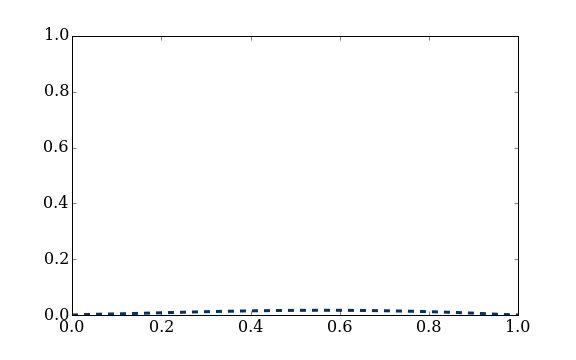
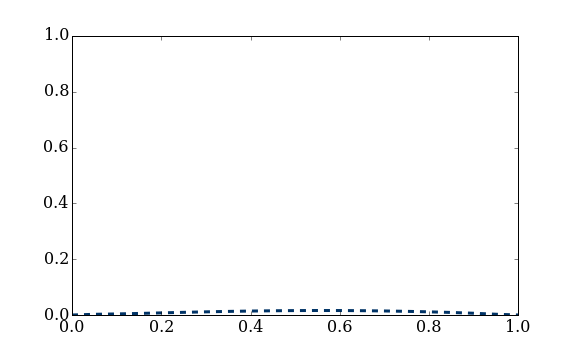
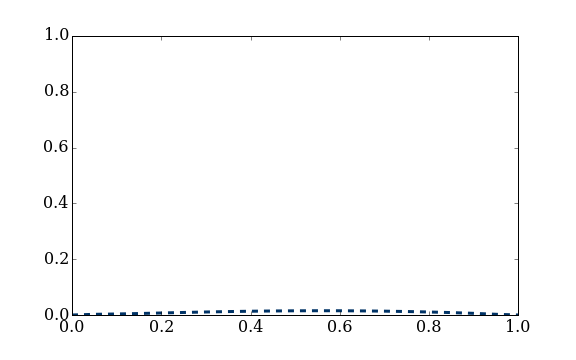
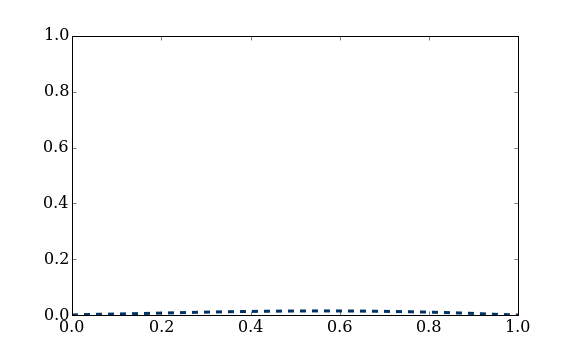
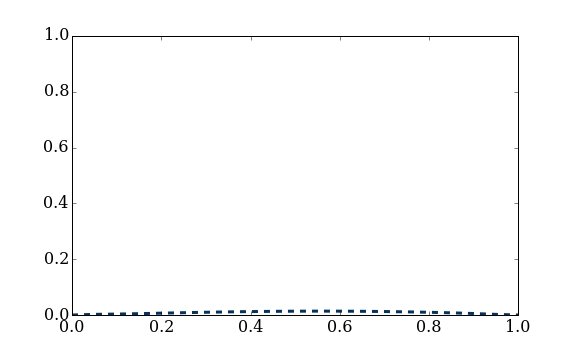
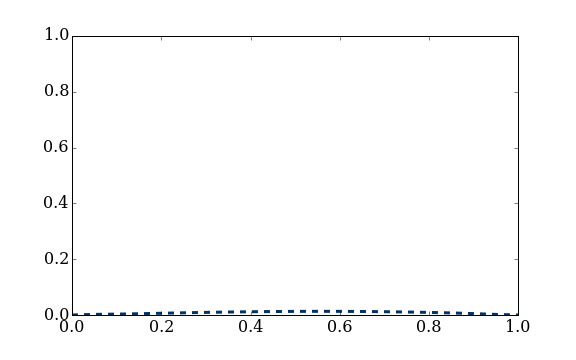
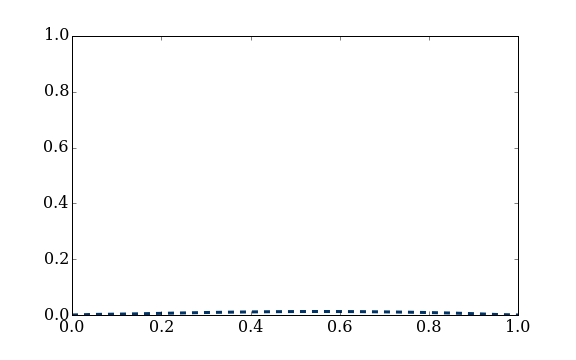
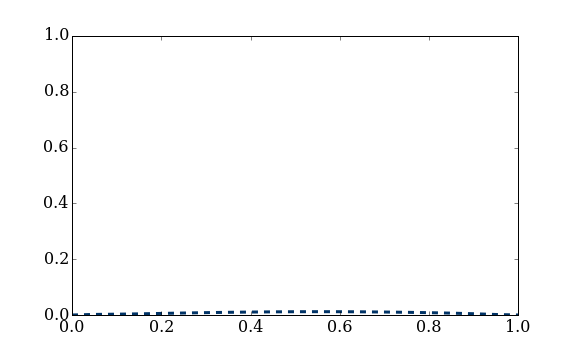
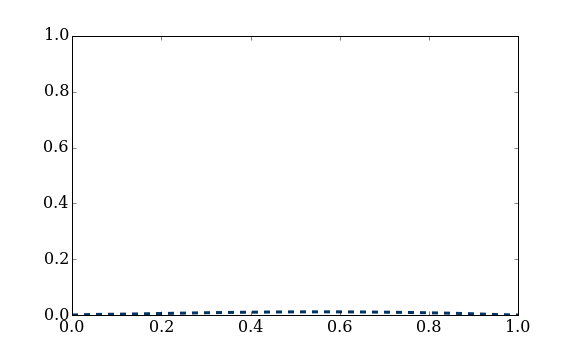
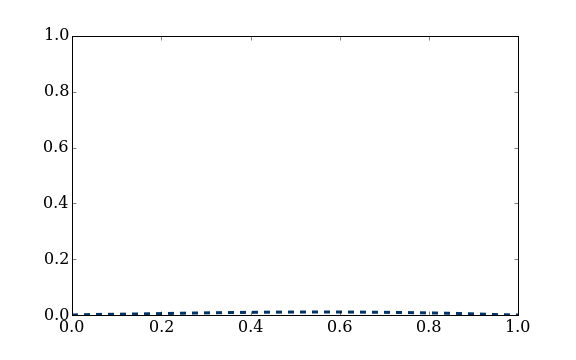
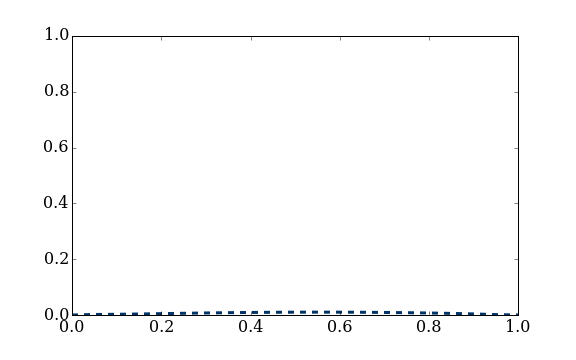
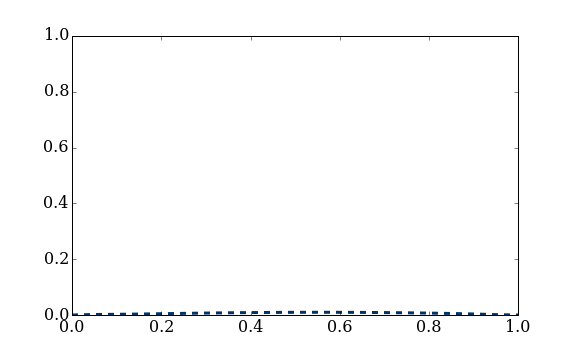
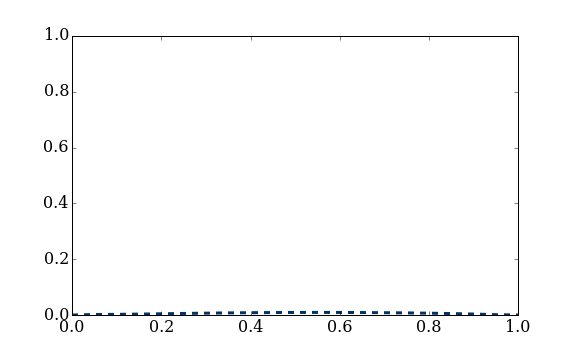
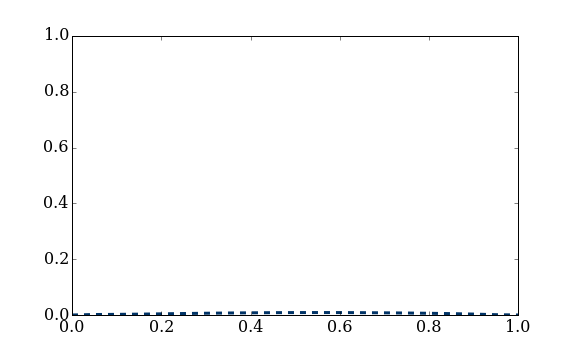
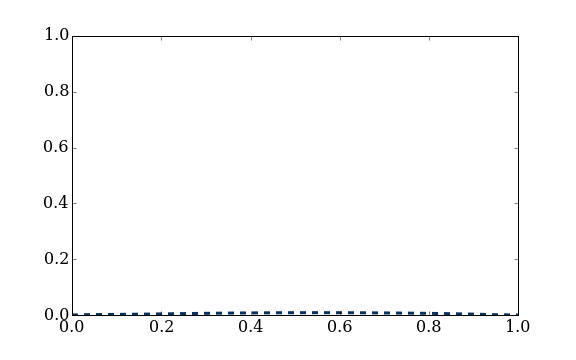
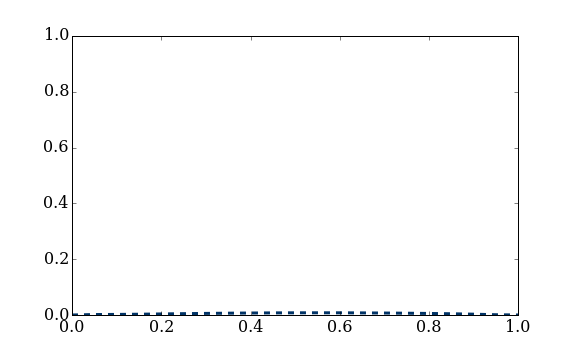
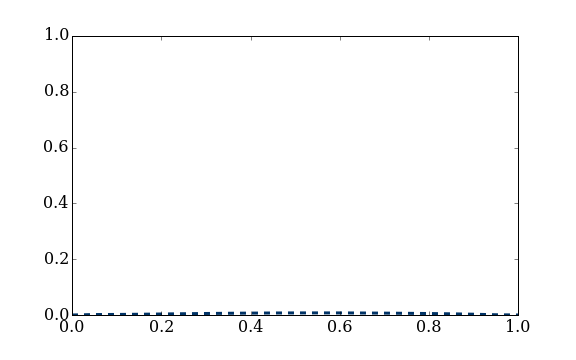
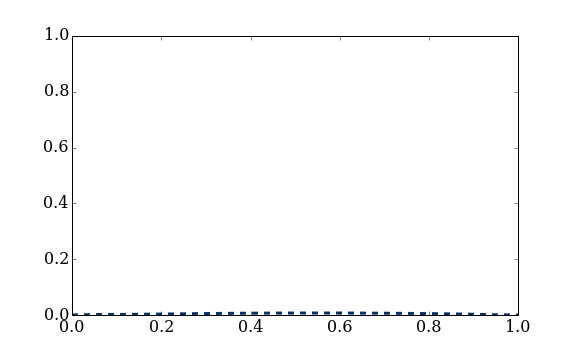
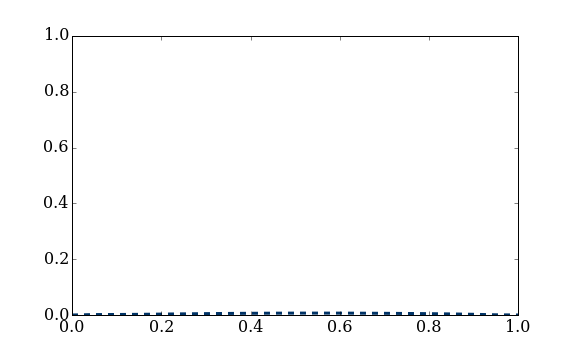
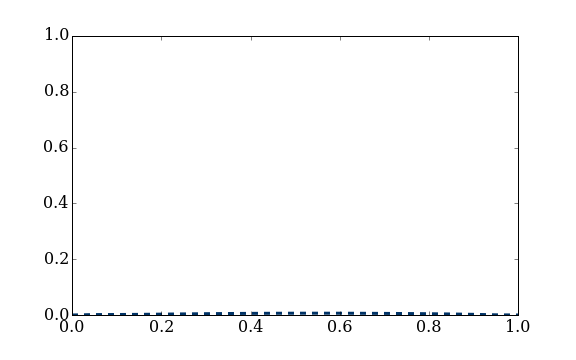
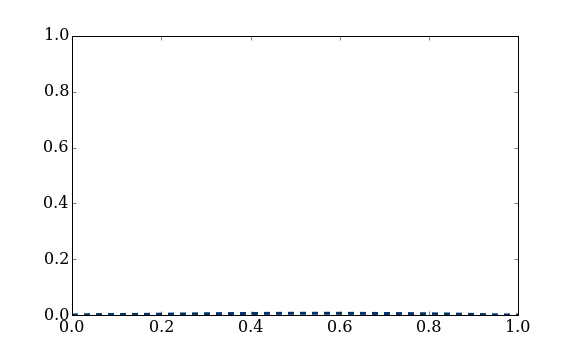

In [40]:
fig = pyplot.figure(figsize=(8,5))
# ax = pyplot.axes()
pyplot.axis([0, 1, 0, 1.0])
line = pyplot.plot([], [], color='#003366', ls='--', lw=3)[0]

def display_varying_c(i):
    u = crank_nikolson(1, i/100.0)
    line.set_data(X, u[m/2, :])
    # line.label(r't = ' + str(i*dt))
    # line.aname('x')
animation.FuncAnimation(fig, display_varying_c,
                        frames=100, interval=100)


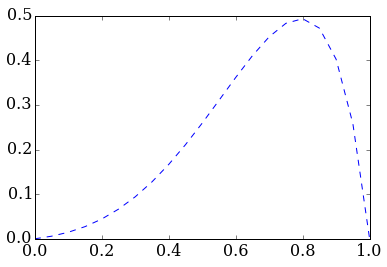

In [15]:
U1 = crank_nikolson(1, 0.1)
#U2 = crank_nikolson(1, 0.5)
#U3 = crank_nikolson(1, 1)
pyplot.plot(X, U1[10, :], '--')
# pyplot.axes(xlim=(0,1), ylim=(0,2.5))
# pyplot.axes(xlim=(0, 1))
# plt.plot(U2[10, :], '.-'); plt.plot(U3[10, :], '.')